In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
stars = pd.read_csv('6 class csv.csv')
stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
stars[['Temperature (K)','Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']] = scaler.fit_transform(stars[['Temperature (K)','Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']])

In [4]:
del stars['Star color']
del stars['Spectral Class']
del stars['Star type']

In [5]:
from sklearn.cluster import KMeans

In [6]:
stars_KMeans_2 = KMeans(n_clusters=2, random_state=123).fit(stars)
stars_KMeans_2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
stars_KMeans_2.inertia_

32.98909879461524

In [8]:
stars_KMeans_3 = KMeans(n_clusters=3, random_state=123).fit(stars)
stars_KMeans_3.labels_
stars_KMeans_3.inertia_

20.014438534246953

In [9]:
inertia =[]
for k in range(1, 10):
    stars_KMeans = KMeans(n_clusters=k, random_state=123).fit(stars)
    inertia.append(stars_KMeans.inertia_)

C:\Users\0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
inertia

[68.47963049549084,
 32.98909879461524,
 20.014438534246953,
 16.234962057371963,
 12.41265073329212,
 9.765844676472888,
 7.834458780872541,
 6.524290108185132,
 5.9050166441687235]

Text(0, 0.5, 'Сумма квадратов расстояний')

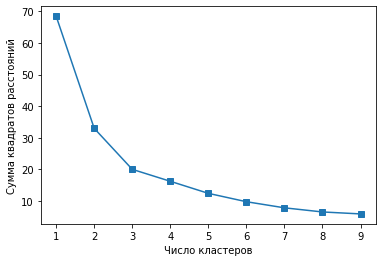

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(1,10), inertia, marker='s')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')

In [12]:
labels_3 = pd.Series(stars_KMeans_3.labels_, index=stars.index, name='Clusters')
labels_3

0      1
1      1
2      1
3      1
4      1
      ..
235    2
236    2
237    2
238    2
239    2
Name: Clusters, Length: 240, dtype: int32

In [13]:
stars_3 = pd.concat([stars, labels_3], axis=1)
stars_3

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Clusters
0,0.029663,2.731275e-09,0.000083,0.876798,1
1,0.028980,4.944550e-10,0.000075,0.891807,1
2,0.017367,2.590003e-10,0.000048,0.957473,1
3,0.022622,1.412729e-10,0.000078,0.893371,1
4,0.000000,6.828189e-11,0.000049,1.000000,1
...,...,...,...,...,...
235,0.972150,4.412776e-01,0.695919,0.062226,2
236,0.759307,9.818959e-01,0.612777,0.040338,2
237,0.181025,6.327765e-01,0.730304,0.037211,2
238,0.191692,4.767253e-01,0.570694,0.021576,2


In [14]:
stars_3.groupby('Clusters').describe()

Temperature (K)                                                    \
                   count      mean       std       min       25%       50%   
Clusters                                                                     
0                   68.0  0.407869  0.268308  0.028086  0.201827  0.365046   
1                  133.0  0.124434  0.146472  0.000000  0.030372  0.041302   
2                   39.0  0.248257  0.314519  0.038359  0.043706  0.047634   

                             Luminosity(L/Lo)                ... Radius(R/Ro)  \
               75%       max            count          mean  ...          75%   
Clusters                                                     ...                
0         0.590559  1.000000             68.0  2.332955e-01  ...     0.029891   
1         0.174220  0.605896            133.0  6.154723e-07  ...     0.000168   
2         0.473267  0.972150             39.0  3.697806e-01  ...     0.784192   

                   Absolute magnitude(Mv)                                \
               max                  count      mean       std       min   
Clusters                                                                  
0         0.363816                   68.0  0.220428  0.070769  0.127580   
1         0.001345                  133.0  0.786834  0.124484  0.418074   
2         1.000000                   39.0  0.069394  0.045095  0.000000   

                                                  
               25%       50%       75%       max  
Clusters                                          
0         0.174406  0.189259  0.254925  0.411382  
1         0.731395  0.785491  0.887117  1.000000  
2         0.032208  0.062226  0.116010  0.135710  

[3 rows x 32 columns]

In [15]:
stars_3.groupby('Clusters').mean()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
Clusters,,,,
0,0.407869,2.332955e-01,0.022009,0.220428
1,0.124434,6.154723e-07,0.000128,0.786834
2,0.248257,3.697806e-01,0.710170,0.069394


In [16]:
stars_3.groupby('Clusters').groups

{0: [30, 31, 32, 33, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 95, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 178, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229], 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 34, 35, 36, 37, 38, 39, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, ...], 2: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 170, 171, 172, 173, 174, 175, 176, 177, 179, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239]}

In [17]:
from scipy.cluster.hierarchy import linkage

In [18]:
Z = linkage(stars, method='ward')

In [19]:
from scipy.cluster.hierarchy import dendrogram

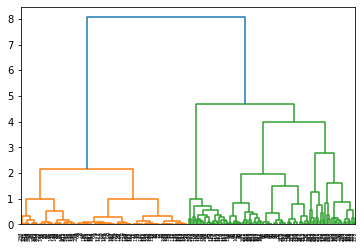

In [20]:
dn = dendrogram(Z, leaf_rotation=90)

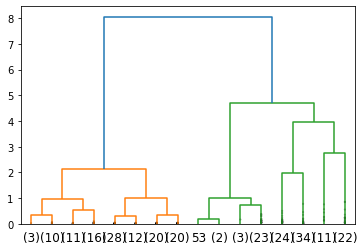

In [21]:
Z_1 = dendrogram(Z,truncate_mode='level',p=3,show_contracted=True)

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
stars_AC = AgglomerativeClustering(n_clusters=2).fit(stars)
stars_AC

AgglomerativeClustering()

In [24]:
labels_AC_3 = pd.Series(stars_AC.labels_, index=stars.index, name='Clusters')
labels_AC_3

0      1
1      1
2      1
3      1
4      1
      ..
235    0
236    0
237    0
238    0
239    0
Name: Clusters, Length: 240, dtype: int64

In [25]:
stars_AC_3 = pd.concat([stars, labels_AC_3], axis=1)
stars_AC_3

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Clusters
0,0.029663,2.731275e-09,0.000083,0.876798,1
1,0.028980,4.944550e-10,0.000075,0.891807,1
2,0.017367,2.590003e-10,0.000048,0.957473,1
3,0.022622,1.412729e-10,0.000078,0.893371,1
4,0.000000,6.828189e-11,0.000049,1.000000,1
...,...,...,...,...,...
235,0.972150,4.412776e-01,0.695919,0.062226,0
236,0.759307,9.818959e-01,0.612777,0.040338,0
237,0.181025,6.327765e-01,0.730304,0.037211,0
238,0.191692,4.767253e-01,0.570694,0.021576,0


In [26]:
stars_AC_3.groupby('Clusters').describe()

Temperature (K)                                                    \
                   count      mean       std       min       25%       50%   
Clusters                                                                     
0                  120.0  0.323643  0.288454  0.028086  0.049736  0.224166   
1                  120.0  0.126080  0.153697  0.000000  0.028665  0.039345   

                             Luminosity(L/Lo)                ... Radius(R/Ro)  \
               75%       max            count          mean  ...          75%   
Clusters                                                     ...                
0         0.553973  1.000000            120.0  2.523801e-01  ...     0.611238   
1         0.188572  0.605896            120.0  3.254240e-09  ...     0.000119   

                  Absolute magnitude(Mv)                                \
              max                  count      mean       std       min   
Clusters                                                                 
0         1.00000                  120.0  0.201880  0.139785  0.000000   
1         0.00037                  120.0  0.817657  0.084422  0.689181   

                                                  
               25%       50%       75%       max  
Clusters                                          
0         0.119997  0.177767  0.254925  0.576173  
1         0.745466  0.801907  0.894309  1.000000  

[2 rows x 32 columns]

In [27]:
stars_AC_3.groupby('Clusters').mean()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
Clusters,,,,
0,0.323643,2.523801e-01,0.243343,0.201880
1,0.126080,3.254240e-09,0.000076,0.817657


In [28]:
stars_AC_3.groupby('Clusters').groups

{0: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, ...], 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, ...]}